# Survival Analysis

### What is Survival Analysis?

- Traditionally used in the medical & actuarial field, survival analysis is becoming more common to use for HR practices


- It helps us measure the durations between the birth event (hire date), and death event (termination date)


- Formula: S(t) == P( T > t)
    - The formula is basically saying, “What is the probability that the individual stays in the company longer than t”
    - T = is the lifetime of a member of the population (Random)
    - t = time
    - S(t) = is the survival curve at time t



In [2]:
# importing libraries #


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#!pip install tabulate
import pandas as pd
import numpy as np
import copy
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# lifelines
from lifelines import NelsonAalenFitter, CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.utils import median_survival_times

In [5]:
### Let's load in the data ###
### Fake dataset sourced from kaggle - https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v13.csv ###


df = pd.read_csv('https://raw.githubusercontent.com/amcgrory/Survival-Analysis-HR-Data-Example/main/Turnover.csv')

In [6]:
df.head()

,Employee_Name,EmpID,event_observed,PositionID,Position,State,Zip,DOB,AgeGroup,Sex,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Monkfish, Erasumus",1404066711,0,20,Production Technician II,MA,1450,8/17/1992,Under 40,M,...,Production,David Stanley,14.0,Professional Society,Fully Meets,2.67,3,0,1/8/2019,0.0
1,"Gold, Shenice",1408069539,0,19,Production Technician I,MA,2451,6/18/1992,Under 40,F,...,Production,Ketsia Liebig,19.0,Glassdoor,Fully Meets,1.94,5,0,2/18/2019,0.0
2,"Hutter, Rosalie",1103024924,0,20,Production Technician II,MA,2351,5/7/1992,Under 40,F,...,Production,Webster Butler,NaN,Other,Fully Meets,2.63,3,0,2/14/2019,0.0
3,"Valentin,Jackie",1312063714,0,3,Area Sales Manager,AZ,85006,5/23/1991,Under 40,F,...,Sales,John Smith,17.0,Other,Fully Meets,2.81,3,0,1/17/2019,0.0
4,"Ivey, Rose",1408069882,0,19,Production Technician I,MA,1775,1/28/1991,Under 40,F,...,Production,Brannon Miller,12.0,Professional Society,Fully Meets,3.99,3,0,1/14/2019,0.0


In [7]:
### Looking at data columns ###

print(df.columns.values)

['Employee_Name' 'EmpID' 'event_observed' 'PositionID' 'Position' 'State'
 'Zip' 'DOB' 'AgeGroup' 'Sex' 'MaritalDesc' 'CitizenDesc' 'HispanicLatino'
 'RaceDesc' 'DateofHire' 'DateofTermination' 'DaysWorkingTerm'
 'DaysWorkingActive' 'TermReason' 'EmploymentStatus' 'Department'
 'ManagerName' 'ManagerID' 'RecruitmentSource' 'PerformanceScore'
 'EngagementSurvey' 'EmpSatisfaction' 'SpecialProjectsCount'
 'LastPerformanceReview_Date' 'DaysLateLast30']


In [8]:
pd.isnull(df.DaysWorkingTerm)

0      False
1      False
2      False
3      False
4      False
       ...  
305    False
306    False
307    False
308    False
309    False
Name: DaysWorkingTerm, Length: 310, dtype: bool

In [9]:
# DaysWorkingTerm = how long they were in the role until they termed
# C = Censorship = 1 is they termed, 0 is they haven't in this timeframe

kmf = KaplanMeierFitter()


In [10]:
# Does it make sense to give all actives "0" in this column? --- Doing so fixes the solution! #

T = df['DaysWorkingTerm']

In [11]:
C = df['event_observed']

In [12]:
kmf.fit(T,event_observed=C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 310 total observations, 207 right-censored observations>

Populating the interactive namespace from numpy and matplotlib


C:\Users\amcgrory\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


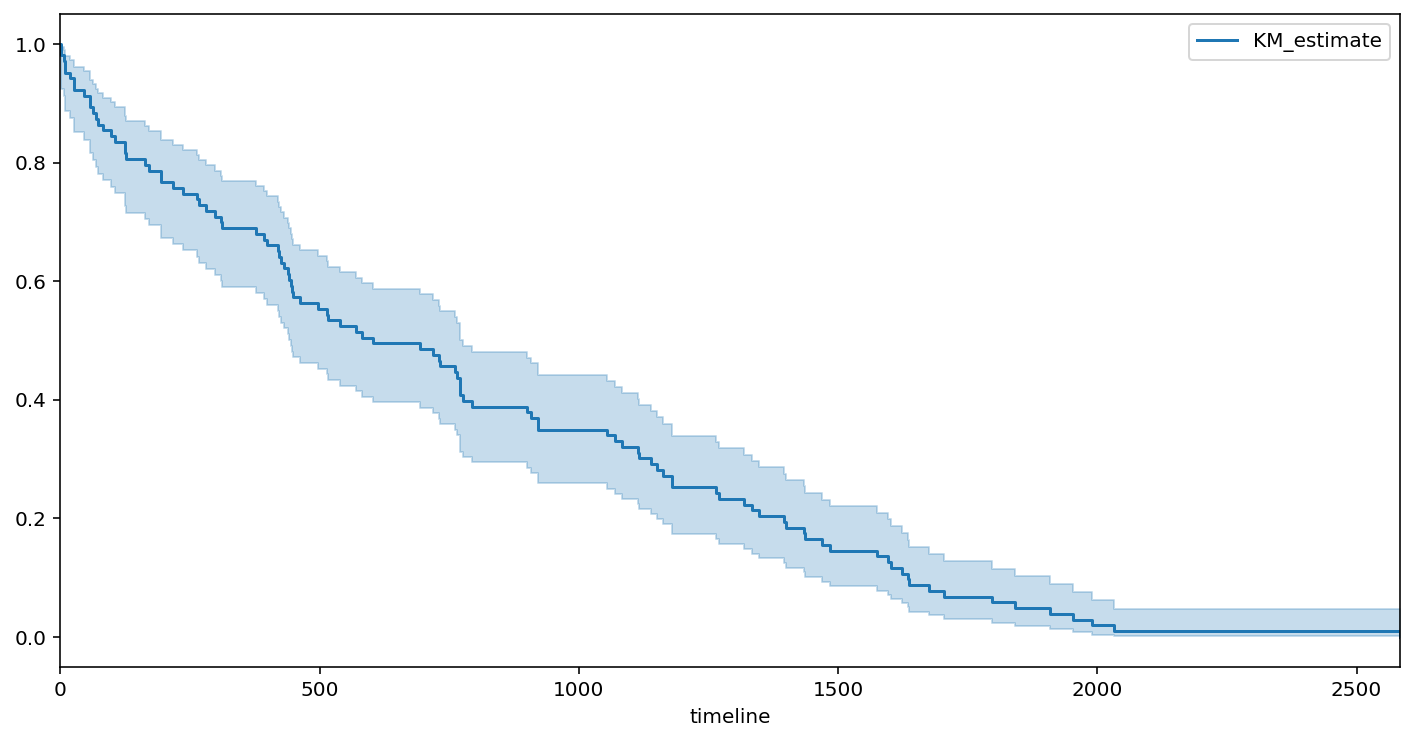

In [13]:
### Survival Analysis on General of dataset ###
### Ignore the pink box below when you run this cell - It's not an error to worry about ###

### The line is called a Kaplin Meier estimator - used to estimate the survival statistic ###
### Chart below tells us, "69.7% probability that employees stay for at least 1 year"


%pylab inline
figsize(12,6)
kmf.plot()

In [58]:
pd.set_option('display.max_rows', None)

print(kmf.survival_function_)

           Over 40
timeline          
0.0       1.000000
2.0       0.953488
8.0       0.930233
27.0      0.906977
62.0      0.883721
69.0      0.860465
98.0      0.837209
105.0     0.813953
170.0     0.790698
218.0     0.767442
267.0     0.744186
309.0     0.720930
311.0     0.697674
399.0     0.674419
419.0     0.651163
425.0     0.627907
444.0     0.604651
462.0     0.581395
571.0     0.558140
581.0     0.534884
732.0     0.511628
770.0     0.465116
777.0     0.441860
922.0     0.418605
1083.0    0.395349
1140.0    0.372093
1162.0    0.348837
1179.0    0.325581
1180.0    0.302326
1265.0    0.279070
1318.0    0.255814
1334.0    0.232558
1347.0    0.209302
1395.0    0.186047
1435.0    0.162791
1436.0    0.139535
1468.0    0.116279
1575.0    0.093023
1635.0    0.069767
1675.0    0.046512
1797.0    0.023256
1842.0    0.000000


C:\Users\amcgrory\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


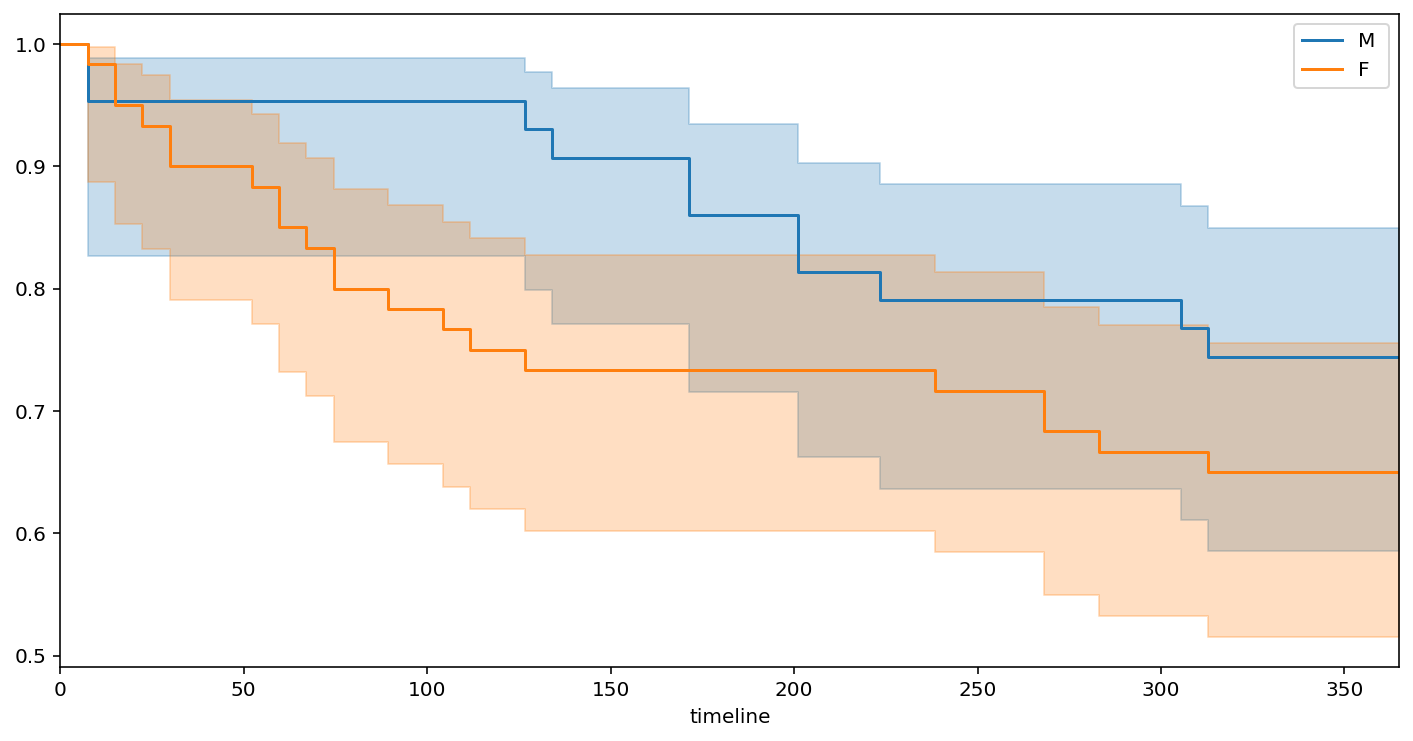

In [56]:
### What if we look at survival analysis by Gender - is one gender terming at a higher rate than others? ###
### After ~25 days, you can see how men are terming less than women at an alarming rate ###


t = np.linspace(0,365)
ax = subplot(111)
figsize(12,6)

for s in df['Sex'].unique():
    ix = df['Sex'] == s
    kmf.fit(T.ix[ix], C.ix[ix],timeline=t, label=s)
    ax = kmf.plot(ax=ax)

C:\Users\amcgrory\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


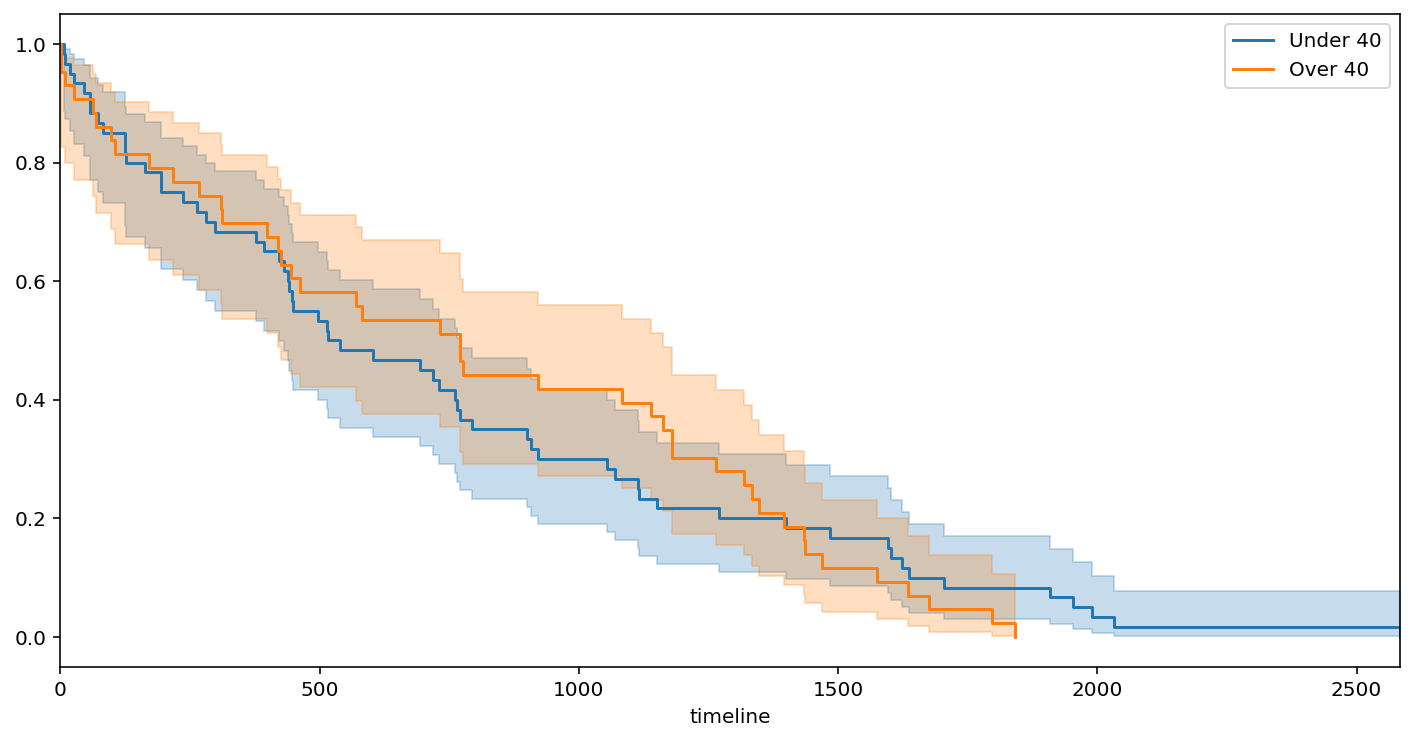

In [59]:
### What if we look at survival analysis by Age Group - is one age group terming at a higher rate than others? ###
### After ~450 days, you can see how those that are over 40 years old are staying longer ###



ax = subplot(111)
figsize(12,6)

for g in df['AgeGroup'].unique():
    ix = df['AgeGroup'] == g
    kmf.fit(T.ix[ix], C.ix[ix], label=g)
    ax = kmf.plot(ax=ax)

# Matrix Analysis Example



##### Will load in another excel file with cases who have only "Termed"

In [14]:
### This dataset is only those cases that have termed ###

df_terms = df = pd.read_csv('https://raw.githubusercontent.com/amcgrory/Survival-Analysis-HR-Data-Example/main/Turnover_Terms_Only.csv')

In [15]:
df_terms.head()

,Employee_Name,EmpID,event_observed,PositionID,Position,State,Zip,DOB,AgeGroup,Sex,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"MacLennan, Samuel",1201031032,1,19,Production Technician I,MA,1938,11/9/1972,Over 40,M,...,hours,Voluntarily Terminated,Production,Amy Dunn,11,Pay Per Click,Fully Meets,3.08,4,0
1,"Baczenski, Rachael",1307060083,1,19,Production Technician I,MA,1902,1/12/1974,Over 40,F,...,Another position,Voluntarily Terminated,Production,David Stanley,14,Diversity Job Fair,Fully Meets,1.79,4,0
2,"Hernandez, Daniff",1410071156,1,8,Database Administrator,MA,1960,8/7/1986,Under 40,M,...,"no-call, no-show",Terminated for Cause,IT/IS,Simon Roup,4,Employee Referral,Fully Meets,4.33,3,7
3,"Evensen, April",1107027392,1,19,Production Technician I,MA,2458,5/6/1989,Under 40,F,...,"no-call, no-show",Terminated for Cause,Production,Elijiah Gray,16,Word of Mouth,Needs Improvement,1.04,3,0
4,"Gerke, Melisa",1308060622,1,19,Production Technician I,MA,2330,5/15/1970,Over 40,F,...,hours,Voluntarily Terminated,Production,Elijiah Gray,16,Diversity Job Fair,Fully Meets,4.24,4,0


In [16]:
print(df_terms.columns.values)

['Employee_Name' 'EmpID' 'event_observed' 'PositionID' 'Position' 'State'
 'Zip' 'DOB' 'AgeGroup' 'Sex' 'MaritalDesc' 'CitizenDesc' 'HispanicLatino'
 'RaceDesc' 'DateofHire' 'DateofTermination' 'DaysWorkingTerm'
 'TermReason' 'EmploymentStatus' 'Department' 'ManagerName' 'ManagerID'
 'RecruitmentSource' 'PerformanceScore' 'EngagementSurvey'
 'EmpSatisfaction' 'SpecialProjectsCount']


In [17]:
### Create a new variable for Date or Termination, and turn it into a timestamp ###


df_terms['RecodeDateofTermination'] = df_terms['DateofTermination']

In [18]:
print(df_terms.columns.values)

['Employee_Name' 'EmpID' 'event_observed' 'PositionID' 'Position' 'State'
 'Zip' 'DOB' 'AgeGroup' 'Sex' 'MaritalDesc' 'CitizenDesc' 'HispanicLatino'
 'RaceDesc' 'DateofHire' 'DateofTermination' 'DaysWorkingTerm'
 'TermReason' 'EmploymentStatus' 'Department' 'ManagerName' 'ManagerID'
 'RecruitmentSource' 'PerformanceScore' 'EngagementSurvey'
 'EmpSatisfaction' 'SpecialProjectsCount' 'RecodeDateofTermination']


In [19]:
df_terms['RecodeDateofTermination'].tail()

98      4/1/2016
99     5/17/2016
100     4/8/2015
101    5/18/2016
102    9/29/2015
Name: RecodeDateofTermination, dtype: object

In [20]:
df_terms['RecodeDateofTermination'] = pd.to_datetime(df_terms['RecodeDateofTermination'])

In [21]:
type(df_terms['RecodeDateofTermination'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
time = df_terms['RecodeDateofTermination'].iloc[0]


In [23]:
time

Timestamp('2012-09-26 00:00:00')

In [24]:
time.week

39

In [25]:
### Create new variables that show the week, month, and year someone has termed ###

df_terms['week'] = df_terms['RecodeDateofTermination'].apply(lambda time: time.week)
df_terms['month'] = df_terms['RecodeDateofTermination'].apply(lambda time: time.month)
df_terms['year'] = df_terms['RecodeDateofTermination'].apply(lambda time: time.year)

In [26]:
### Scroll to the far right to see new fields ###

df_terms.head()

,Employee_Name,EmpID,event_observed,PositionID,Position,State,Zip,DOB,AgeGroup,Sex,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,RecodeDateofTermination,week,month,year
0,"MacLennan, Samuel",1201031032,1,19,Production Technician I,MA,1938,11/9/1972,Over 40,M,...,11,Pay Per Click,Fully Meets,3.08,4,0,2012-09-26,39,9,2012
1,"Baczenski, Rachael",1307060083,1,19,Production Technician I,MA,1902,1/12/1974,Over 40,F,...,14,Diversity Job Fair,Fully Meets,1.79,4,0,2011-01-12,2,1,2011
2,"Hernandez, Daniff",1410071156,1,8,Database Administrator,MA,1960,8/7/1986,Under 40,M,...,4,Employee Referral,Fully Meets,4.33,3,7,2015-02-22,8,2,2015
3,"Evensen, April",1107027392,1,19,Production Technician I,MA,2458,5/6/1989,Under 40,F,...,16,Word of Mouth,Needs Improvement,1.04,3,0,2014-02-25,9,2,2014
4,"Gerke, Melisa",1308060622,1,19,Production Technician I,MA,2330,5/15/1970,Over 40,F,...,16,Diversity Job Fair,Fully Meets,4.24,4,0,2011-11-15,46,11,2011


In [27]:
### Now that we created the two fields, lets do the Groupby fuction ###
### basically the groupby is a count, but we can turn into into a insightful matrix ###

df_terms.groupby(by=['week','year']).count()

Employee_Name  EmpID  event_observed  PositionID  Position  State  \
week year                                                                      
1    2012              1      1               1           1         1      1   
2    2011              1      1               1           1         1      1   
     2012              2      2               2           2         2      2   
     2013              1      1               1           1         1      1   
     2014              2      2               2           2         2      2   
...                  ...    ...             ...         ...       ...    ...   
46   2015              4      4               4           4         4      4   
48   2012              1      1               1           1         1      1   
50   2015              1      1               1           1         1      1   
51   2015              1      1               1           1         1      1   
52   2012              1      1               1           1         1      1   

           Zip  DOB  AgeGroup  Sex  ...  Department  ManagerName  ManagerID  \
week year                           ...                                       
1    2012    1    1         1    1  ...           1            1          1   
2    2011    1    1         1    1  ...           1            1          1   
     2012    2    2         2    2  ...           2            2          2   
     2013    1    1         1    1  ...           1            1          1   
     2014    2    2         2    2  ...           2            2          2   
...        ...  ...       ...  ...  ...         ...          ...        ...   
46   2015    4    4         4    4  ...           4            4          4   
48   2012    1    1         1    1  ...           1            1          1   
50   2015    1    1         1    1  ...           1            1          1   
51   2015    1    1         1    1  ...           1            1          1   
52   2012    1    1         1    1  ...           1            1          1   

           RecruitmentSource  PerformanceScore  EngagementSurvey  \
week year                                                          
1    2012                  1                 1                 1   
2    2011                  1                 1                 1   
     2012                  2                 2                 2   
     2013                  1                 1                 1   
     2014                  2                 2                 2   
...                      ...               ...               ...   
46   2015                  4                 4                 4   
48   2012                  1                 1                 1   
50   2015                  1                 1                 1   
51   2015                  1                 1                 1   
52   2012                  1                 1                 1   

           EmpSatisfaction  SpecialProjectsCount  RecodeDateofTermination  \
week year                                                                   
1    2012                1                     1                        1   
2    2011                1                     1                        1   
     2012                2                     2                        2   
     2013                1                     1                        1   
     2014                2                     2                        2   
...                    ...                   ...                      ...   
46   2015                4                     4                        4   
48   2012                1                     1                        1   
50   2015                1                     1                        1   
51   2015                1                     1                        1   
52   2012                1                     1                        1   

           month  
week year         
1    2012      1 

### Please note: Sample size of terms was limited in this file

##### The charts below are a good was to visualize when people are terming based of Week/Month. Please be cognizant that our sample is small here. If we had a bigger sample of terms, we would easily see better trends

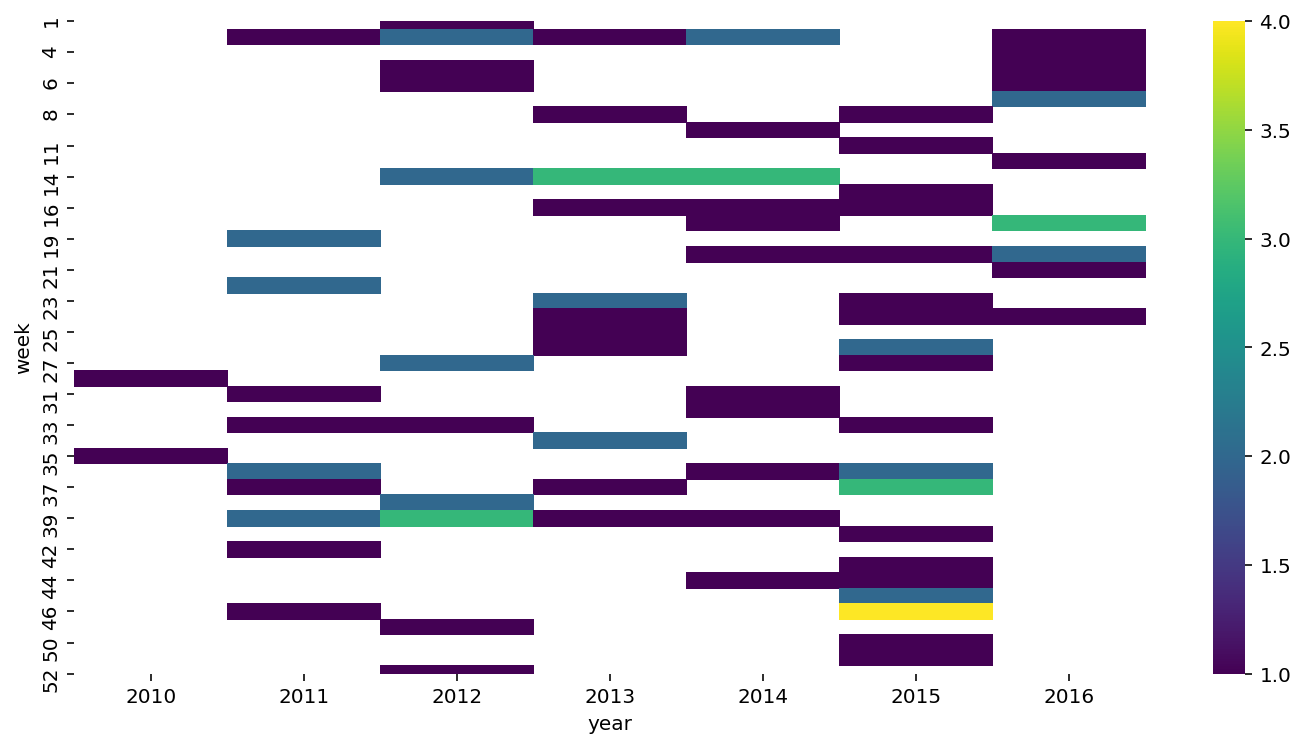

In [28]:
### Sample is small here - but what we are looking at are counts of when people term based off week & year ###
### If sample was bigger, this matrix would be filled and we can see "hot points" on when people are terming ###


weekyear = df_terms.groupby(by=['week','year']).count()['event_observed'].unstack()

plt.figure(figsize =(12,6))
sns.heatmap(weekyear,cmap='viridis')

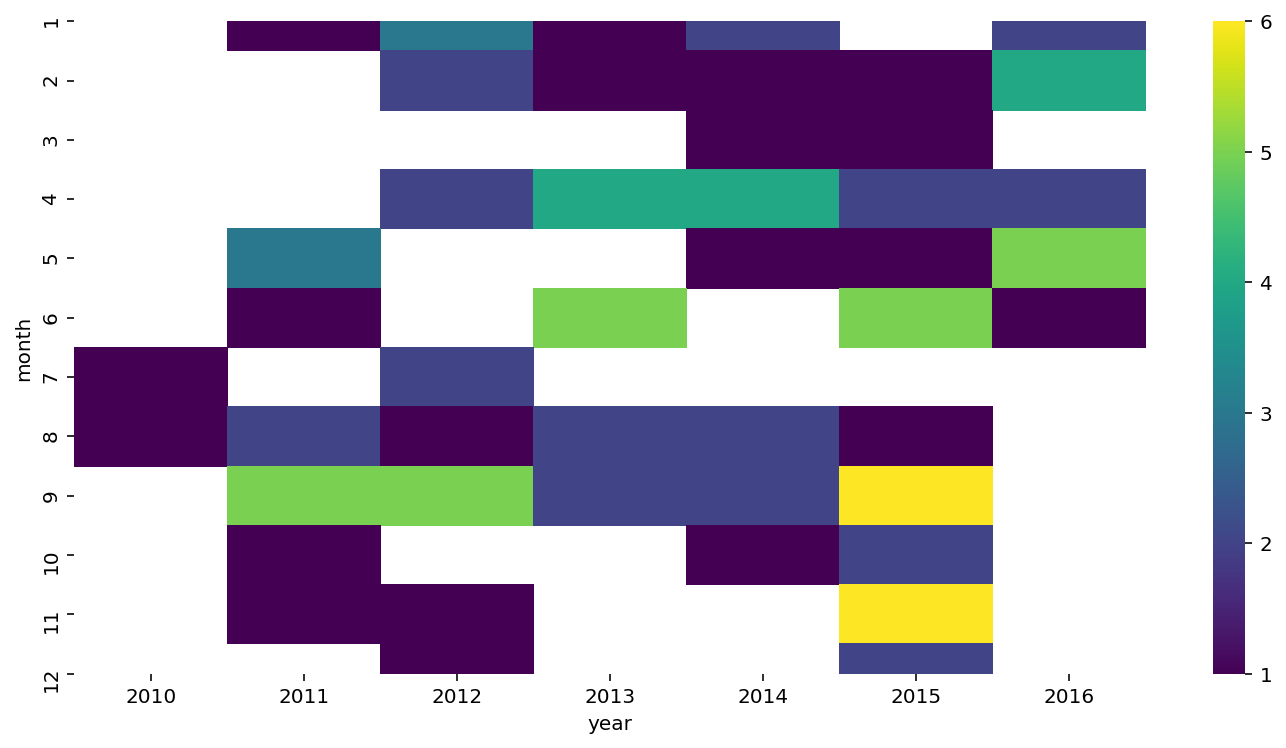

In [29]:
### Again, sample is small here - but what we are looking at counts of when people term by month & year ###
### If sample was bigger, this matrix would be filled and we can see "hot points" on when people are terming ###


monthyear = df_terms.groupby(by=['month','year']).count()['event_observed'].unstack()

plt.figure(figsize =(12,6))
sns.heatmap(monthyear,cmap='viridis')